# correlation of psd slope with age

In [1]:
%matplotlib inline
import os
import glob
import csv as csv
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import signal
from scipy import io
from sklearn import metrics, cross_validation, linear_model
from sklearn.grid_search import GridSearchCV

#### Data Importing

In [2]:
subj = {} # Dictionary that holds all subjects
matfiles = []
for root, dirs, files in os.walk('../data/extClfiltCAR-mat/'):
    matfiles += glob.glob(os.path.join(root, '*.mat'))

    
matfiles.remove('../data/extClfiltCAR-mat/120127133.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127134.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127140.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127154.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127160.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127167.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127132.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127159.mat')
    
for i in range(len(matfiles)):
    datafile = sp.io.loadmat(matfiles[i])
    
    subj[i] = {}
    subj[i]['name']  = str(np.squeeze(datafile['name']))[6:]
    subj[i]['srate'] = int(np.squeeze(datafile['srate']))
    subj[i]['data']  = np.squeeze(datafile['data'])    

#### PSD Slope Results

In [3]:
def compute_slope(f, psd):
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(f[:50*2], np.log10(psd[:50*2]))
    return model_ransac.estimator_.coef_[0][0]

In [4]:
srate = 512
for i in subj:
    for ch in range(len(subj[i]['data'])):
        # For all subjects, compute the slope of each channel
        subj[i][ch] = {}
        
        f, psd = sp.signal.welch(subj[i]['data'][ch], srate, nperseg=srate*2, noverlap=srate, window='hamming')
        f   = f.reshape((len(f), 1))
        psd = psd.reshape((len(psd), 1))
        
        subj[i][ch]['f'] = f
        subj[i][ch]['psd'] = psd
        subj[i][ch]['slope'] = compute_slope(f, psd) * (10**2)
        
    # Now compute each subject's mean slope    
    slopes = []
    for ch in range(len(subj[i]['data'])):
        slopes.append(subj[i][ch]['slope'])
    subj[i]['slope'] = np.mean(slopes)

#### Behavioral Data

In [5]:
df = pd.read_csv('../data/madb_intclasses_use.csv', header=0)
print(df.shape)
df.head()

(54, 101)


,Subject,Class,RAVLT_DEL,Age,Education,Sex_numberic,Animals,BNT_30,LM_1,LM_2,...,C3_BetaPower_fixed,C3_GammaPower_fixed,O1_DeltaPower_fixed,O1_ThetaPower_fixed,O1_AlphaPower_fixed,O1_Alpha1Power_fixed,O1_Alpha2Power_fixed,O1_Alpha3Power_fixed,O1_BetaPower_fixed,O1_GammaPower_fixed
0,101,2,3,80.84873,15,2,18,27,10,9,...,0.36673,0.020071,4.1044,4.88080,3.66930,3.66930,2.11570,0.97352,0.47525,0.106810
1,102,1,8,71.89870,16,1,22,30,15,14,...,0.36673,0.020071,4.1044,4.88080,3.66930,3.66930,2.11570,0.97352,0.47525,0.106810
2,103,1,11,69.43463,14,2,29,29,7,5,...,0.11818,0.029272,1.1242,0.53832,0.77607,0.77607,1.09520,0.62154,0.43603,0.371570
3,104,2,8,83.61396,14,2,22,27,16,15,...,0.58826,0.052404,3.5768,6.75820,23.66680,23.66680,36.56120,6.37160,1.39780,0.091309
4,105,2,7,80.69541,18,2,17,28,20,15,...,0.21081,0.069191,4.7605,1.30960,0.53454,0.53454,0.60461,0.45338,0.20894,0.047831


In [6]:
slopes = []
for i in subj:
    slopes.append(subj[i]['slope'])   

In [7]:
df['PSD_Slope'] = slopes

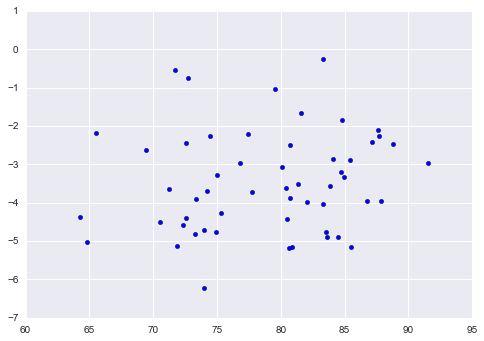

In [8]:
plt.scatter(df['Age'], df['PSD_Slope'])

In [9]:
print("{}, age: {:.2f}, slope: {}".format(df.loc[35, 'Subject'], df.loc[35, 'Age'], df.loc[35, 'PSD_Slope']))
print("{}, age: {:.2f}, slope: {}".format(df.loc[42, 'Subject'], df.loc[42, 'Age'], df.loc[42, 'PSD_Slope']))

146.0, age: 64.82, slope: -5.0301095693843445
156.0, age: 87.86, slope: -3.96232587421594


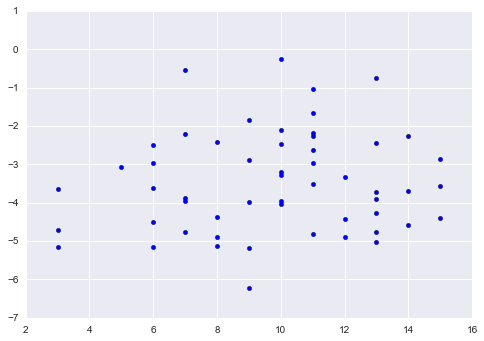

In [10]:
plt.scatter(df['RAVLT_DEL'], df['PSD_Slope'])

From the Voytek paper: 
> This effect is most prominent in visual extrastriate, parietal, and midline frontal cortex.

Let's examine midline frontal -- A1_Fpz electrode.

In [11]:
subj = {} # Dictionary that holds all subjects
matfiles = []
for root, dirs, files in os.walk('../data/extClfiltCAR-mat/'):
    matfiles += glob.glob(os.path.join(root, '*.mat'))

matfiles.remove('../data/extClfiltCAR-mat/120127133.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127134.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127140.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127154.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127160.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127167.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127132.mat')
matfiles.remove('../data/extClfiltCAR-mat/120127159.mat')
    
for i in range(len(matfiles)):
    datafile = sp.io.loadmat(matfiles[i])
    
    subj[i] = {}
    subj[i]['name']  = str(np.squeeze(datafile['name']))
    subj[i]['srate'] = int(np.squeeze(datafile['srate']))
    subj[i]['data']  = np.squeeze(datafile['data'])   

In [12]:
def compute_slope(f, psd):
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(f[:50*2], np.log10(psd[:50*2]))
    return model_ransac.estimator_.coef_[0][0]

In [13]:
srate = 512
for i in subj:
    for ch in range(len(subj[i]['data'])):
        # For all subjects, compute the slope of each channel
        subj[i][ch] = {}
        
        f, psd = sp.signal.welch(subj[i]['data'][ch], srate, nperseg=srate*2, noverlap=srate, window='hamming')
        f   = f.reshape((len(f), 1))
        psd = psd.reshape((len(psd), 1))
        
        subj[i][ch]['f'] = f
        subj[i][ch]['psd'] = psd
        subj[i][ch]['slope'] = compute_slope(f, psd) * (10**2)
        
    # Now compute each subject's mean slope    
    slopes = []
    for ch in range(len(subj[i]['data'])):
        slopes.append(subj[i][ch]['slope'])
    subj[i]['slope'] = np.mean(slopes)

In [14]:
a1_fpz = []
for i in subj:
    a1_fpz.append(subj[i][0]['slope'])

In [15]:
df['a1_fpz'] = a1_fpz

In [16]:
regr = linear_model.LinearRegression()
reger.fit()
plt.figure(figsize=(16,10))
plt.scatter(df['PSD_Slope'], df['RAVLT_DEL'])

NameError: name 'reger' is not defined

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(df['a1_fpz'], df['RAVLT_DEL'])

In [ ]:
superagers = df[df['Class'].isin([3])]

In [ ]:
mci_cohort = df[df['Class'].isin([0, 1])]

In [ ]:
mci_cohort.head()

In [ ]:
plt.scatter(mci_cohort['PSD_Slope'], mci_cohort['RAVLT_DEL'])

In [ ]:
np.corrcoef(df['RAVLT_DEL'], df['a1_fpz'])

In [ ]:
np.corrcoef(np.reshape(len(df['RAVLT_DEL']), 1), df['PSD_Slope'])

In [ ]:
regr = linear_model.LinearRegression()
train = np.reshape(df['a1_fpz'], (len(df['a1_fpz']), 1))
test  = np.reshape(df['RAVLT_DEL'], (len(df['RAVLT_DEL']), 1))
regr.fit( train, test )
print("Coefficients: \n", regr.coef_)

In [ ]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(train) - test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % regr.score(train, test))

In [ ]:
plt.scatter(train, test,  color='black')
plt.plot(train, regr.predict(train), color='blue',
         linewidth=3)